## Выгрузка данных по расположению аэропортов

In [1]:
import numpy as np
import pandas as pd
columns = ['Airport ID', 'Name', 'City', 'Country', 'IATA', 'ICAO', 'Latitude', 'Longitude', 
           'Altitude', 'Timezone', 'DST', 'Tz database time zone', 'Type', 'Source']
airport = pd.read_csv("airports.csv", index_col = 0, names = columns).reset_index(drop = True).replace('\\N', np.nan)
airport.tail(10)

,Name,City,Country,IATA,ICAO,Latitude,Longitude,Altitude,Timezone,DST,Tz database time zone,Type,Source
7688,Rustaq Airport,Al Masna'ah,Oman,MNH,OORQ,23.640556,57.487500,349,NaN,NaN,NaN,airport,OurAirports
7689,Laguindingan Airport,Cagayan de Oro City,Philippines,CGY,RPMY,8.612203,124.456496,190,NaN,NaN,NaN,airport,OurAirports
7690,Kostomuksha Airport,Kostomuksha,Russia,NaN,ULPM,64.617996,30.687000,681,NaN,NaN,NaN,airport,OurAirports
7691,Privolzhskiy Air Base,Astrakhan,Russia,NaN,XRAP,46.396000,47.893000,-66,NaN,NaN,NaN,airport,OurAirports
7692,Kubinka Air Base,Kubinka,Russia,NaN,UUMB,55.611695,36.650002,614,NaN,NaN,NaN,airport,OurAirports
7693,Rogachyovo Air Base,Belaya,Russia,NaN,ULDA,71.616699,52.478298,272,NaN,NaN,NaN,airport,OurAirports
7694,Ulan-Ude East Airport,Ulan Ude,Russia,NaN,XIUW,51.849998,107.737999,1670,NaN,NaN,NaN,airport,OurAirports
7695,Krechevitsy Air Base,Novgorod,Russia,NaN,ULLK,58.625000,31.385000,85,NaN,NaN,NaN,airport,OurAirports
7696,Desierto de Atacama Airport,Copiapo,Chile,CPO,SCAT,-27.261200,-70.779198,670,NaN,NaN,NaN,airport,OurAirports
7697,Melitopol Air Base,Melitopol,Ukraine,NaN,UKDM,46.880001,35.305000,0,NaN,NaN,NaN,airport,OurAirports


### Очистка данных от пропущенных значений по "IATA"

In [2]:
iata = airport[~airport['IATA'].isna()].copy()
iata.head(3)

,Name,City,Country,IATA,ICAO,Latitude,Longitude,Altitude,Timezone,DST,Tz database time zone,Type,Source
0,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.08169,145.391998,5282,10,U,Pacific/Port_Moresby,airport,OurAirports
1,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.20708,145.789001,20,10,U,Pacific/Port_Moresby,airport,OurAirports
2,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.82679,144.296005,5388,10,U,Pacific/Port_Moresby,airport,OurAirports


### Создание визуализации всех аэропортов по координатам

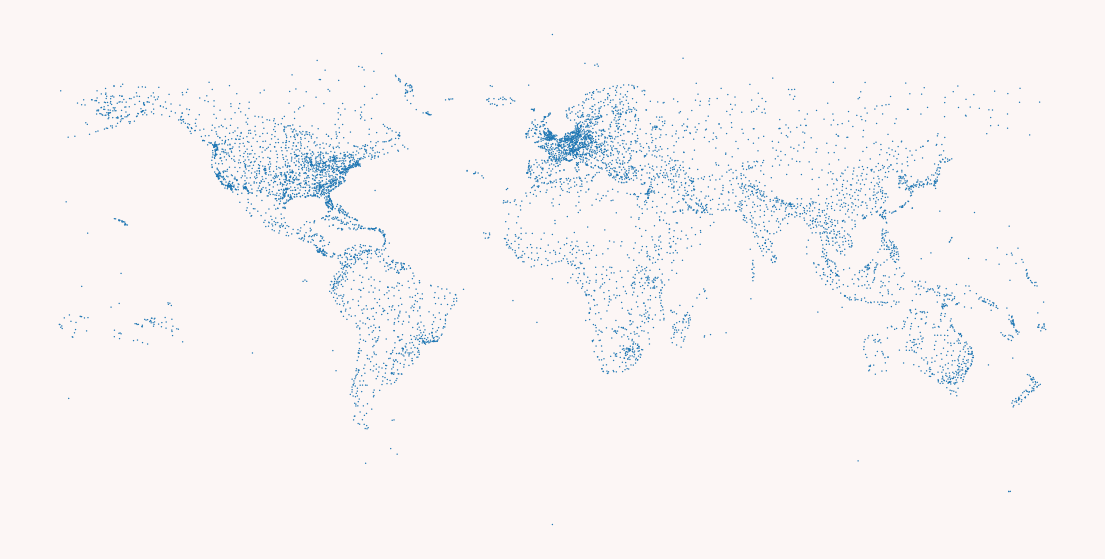

In [3]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(14, 7)

ax.scatter(airport['Longitude'], airport['Latitude'], s=1, alpha=1, edgecolors='none')
ax.axis('off')

plt.show()

## Выгрузка данных по перелетам

In [4]:
columns_r = ['Airline', 'Airline ID', 'Source airport', 'Source airport ID', 'Destination airport', 
           'Destination airport ID', 'Codeshare', 'Stops', 'Equipment']

routes = pd.read_csv("routes.csv", index_col = 0, names = columns_r).reset_index(drop = True).replace('\\N', np.nan)
routes.tail(10)

,Airline ID,Source airport,Source airport ID,Destination airport,Destination airport ID,Codeshare,Stops,Equipment
67653,4178,TSV,3330,WIN,6337,NaN,0,SF3
67654,4178,WGA,3363,MEL,3339,NaN,0,SF3
67655,4178,WGA,3363,SYD,3361,NaN,0,SF3
67656,4178,WIN,6337,LRE,6289,NaN,0,SF3
67657,4178,WIN,6337,TSV,3330,NaN,0,SF3
67658,4178,WYA,6334,ADL,3341,NaN,0,SF3
67659,19016,DME,4029,FRU,2912,NaN,0,734
67660,19016,FRU,2912,DME,4029,NaN,0,734
67661,19016,FRU,2912,OSS,2913,NaN,0,734
67662,19016,OSS,2913,FRU,2912,NaN,0,734


## Подсчет числа вылетов и прилетов, их суммы для каждого аэропорта

In [5]:
arrival = routes[['Source airport', 'Destination airport']].groupby('Destination airport').count() #вылет
departure = routes[['Source airport', 'Destination airport']].groupby('Source airport').count() # прилет
tablo = departure.join(arrival, how = 'outer').fillna(0).astype(int) 
tablo['Summary'] = tablo['Destination airport'] + tablo['Source airport']
tablo.head()

,Destination airport,Source airport,Summary
AAE,9,9,18
AAL,20,21,41
AAN,2,2,4
AAQ,3,3,6
AAR,8,8,16


### Объединение данных по перелетам с данными по аэропортам

In [6]:
network = airport.merge(tablo, left_on='IATA', right_index=True, how='left')

In [7]:
network.head(3)

,Name,City,Country,IATA,ICAO,Latitude,Longitude,Altitude,Timezone,DST,Tz database time zone,Type,Source,Destination airport,Source airport,Summary
0,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.08169,145.391998,5282,10,U,Pacific/Port_Moresby,airport,OurAirports,5.0,5.0,10.0
1,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.20708,145.789001,20,10,U,Pacific/Port_Moresby,airport,OurAirports,8.0,8.0,16.0
2,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.82679,144.296005,5388,10,U,Pacific/Port_Moresby,airport,OurAirports,10.0,12.0,22.0


## Добавление континетов, на которых располагаются аэропорты
### Используются две взаимодополняющие библиотеки (сначала awoc, потом country_converter), после чего вручную добавляются отсутствующие в них страны. В случае библиотеки "country_converter" вручную исправляется назване континента с "America" на "South/North America"

In [8]:
import awoc
import country_converter as coco
world = awoc.AWOC()
cc = coco.CountryConverter()

def country_2_continent(country_name):
    try: continent_name = world.get_country_continent_name(country_name) 
    except NameError:
        continent_name = cc.convert(names = country_name, to = 'continent')
    return continent_name

network['Continent'] = network['Country'].map(lambda x: country_2_continent(x))

idx_sa = network[network['Country'] == 'French Guiana'].Continent.index
network.loc[idx_sa, 'Continent'] = 'South America'
idx_na = network[network['Country'].isin(['Martinique', 'Guadeloupe', 'Virgin Islands', 
                                       'Midway Islands', 'Johnston Atoll', 'Wake Island'])].Continent.index
network.loc[idx_na, 'Continent'] = 'North America'

network['Continent'].unique() # проверка, что нет неучтенных значений

Midway Islands not found in regex
Virgin Islands not found in regex
Virgin Islands not found in regex
Johnston Atoll not found in regex
Virgin Islands not found in regex
Wake Island not found in regex


array(['Oceania', 'North America', 'Europe', 'Africa', 'South America',
       'Asia', 'Antarctica'], dtype=object)

### Создание датафрейма, содержащего топ N аэропортов по количеству перелетов на каждом из континентов, кроме Антарктиды

In [25]:
n = 6 # количество аэропортов на каждом континенте
countries = network[['Continent', 'Summary']].groupby('Continent').sum().nlargest(6, 'Summary').index # 6 контитентов с наибольшим числом полетов
top_airports = network[network['Continent'].isin(countries)].groupby('Continent').apply(lambda x: x.nlargest(n, 'Summary'))[['Continent', 'IATA', 'Name', 'City', 'Summary', 'Latitude', 'Longitude']].reset_index(drop=True)#.set_index('Continent')
top_airports

,Continent,IATA,Name,City,Summary,Latitude,Longitude
0,Africa,JNB,OR Tambo International Airport,Johannesburg,321.0,-26.139200,28.246000
1,Africa,CAI,Cairo International Airport,Cairo,303.0,30.121901,31.405600
2,Africa,NBO,Jomo Kenyatta International Airport,Nairobi,258.0,-1.319240,36.927799
3,Africa,CMN,Mohammed V International Airport,Casablanca,250.0,33.367500,-7.589970
4,Africa,ADD,Addis Ababa Bole International Airport,Addis Ababa,214.0,8.977890,38.799301
5,Africa,ALG,Houari Boumediene Airport,Algier,176.0,36.691002,3.215410
6,Asia,PEK,Beijing Capital International Airport,Beijing,1069.0,40.080101,116.584999
7,Asia,PVG,Shanghai Pudong International Airport,Shanghai,825.0,31.143400,121.805000
8,Asia,SIN,Singapore Changi Airport,Singapore,820.0,1.350190,103.994003
9,Asia,ICN,Incheon International Airport,Seoul,740.0,37.469101,126.450996


### Рандомный выбор континентотов вылета и прилета, указание топ N аэропортов на них

In [28]:
import random

continent_source = random.choice(top_airports['Continent'])
continent_destin = random.choice(top_airports['Continent'])
airports_cont_source = list(top_airports[top_airports['Continent']==continent_source].IATA)
airports_cont_destin = list(top_airports[top_airports['Continent']==continent_destin].IATA)
print('Континент вылета: ', continent_source, '\nАэропорты: ', airports_cont_source, '\nКонтинент прилета: ', continent_destin, '\nАэропорты: ', airports_cont_destin)

Континент вылета:  North America 
Аэропорты:  ['ATL', 'ORD', 'LAX', 'DFW', 'JFK', 'DEN'] 
Континент прилета:  Asia 
Аэропорты:  ['PEK', 'PVG', 'SIN', 'ICN', 'IST', 'DXB']


### Создание отдельных датафреймов для аэропортов континентов вылета и прилета

In [29]:
source_airports = top_airports[top_airports['Continent']==continent_source].reset_index(drop=True)
destination_airports = top_airports[top_airports['Continent']==continent_destin].reset_index(drop=True)
source_airports.head()

,Continent,IATA,Name,City,Summary,Latitude,Longitude
0,North America,ATL,Hartsfield Jackson Atlanta International Airport,Atlanta,1826.0,33.636700,-84.428101
1,North America,ORD,Chicago O'Hare International Airport,Chicago,1108.0,41.978600,-87.904800
2,North America,LAX,Los Angeles International Airport,Los Angeles,990.0,33.942501,-118.407997
3,North America,DFW,Dallas Fort Worth International Airport,Dallas-Fort Worth,936.0,32.896801,-97.038002
4,North America,JFK,John F Kennedy International Airport,New York,911.0,40.639801,-73.778900


In [30]:
destination_airports.head()

,Continent,IATA,Name,City,Summary,Latitude,Longitude
0,Asia,PEK,Beijing Capital International Airport,Beijing,1069.0,40.080101,116.584999
1,Asia,PVG,Shanghai Pudong International Airport,Shanghai,825.0,31.143400,121.805000
2,Asia,SIN,Singapore Changi Airport,Singapore,820.0,1.350190,103.994003
3,Asia,ICN,Incheon International Airport,Seoul,740.0,37.469101,126.450996
4,Asia,IST,Istanbul Airport,Istanbul,719.0,41.275278,28.751944


### Подсчет полетов между аэропортами

In [31]:
df_source_destination = routes[routes['Source airport'].isin(airports_cont_source) &  
                               routes['Destination airport'].isin(airports_cont_destin)] 
df_source_destination = df_source_destination.copy()
top_n_tablo = df_source_destination[['Destination airport', 'Source airport', 'Source airport ID']].groupby(['Destination airport', 'Source airport']).count().reset_index()
top_n_tablo.rename(columns = {'Source airport ID' : 'Number of flights'}, inplace=True)
top_n_tablo


,Destination airport,Source airport,Number of flights
0,DXB,ATL,1
1,DXB,DFW,2
2,DXB,JFK,2
3,DXB,LAX,2
4,ICN,ATL,2
5,ICN,DFW,4
6,ICN,JFK,4
7,ICN,LAX,5
8,ICN,ORD,3
9,IST,JFK,2


### Подготовка данных для визуализации: списки с координатами, городами

In [32]:
lat_source = []
lon_source = []
city_source = []
lat_destin = []
lon_destin = []
city_destin = []

for i in airports_cont_source:
    lat = float(iata[iata['IATA'] == i].Latitude)
    lon = float(iata[iata['IATA'] == i].Longitude)
    city = iata[iata['IATA'] == i].City
    lat_source.append(lat)
    lon_source.append(lon)
    city_source.append(city)
    
for i in airports_cont_destin:
    lat = float(iata[iata['IATA'] == i].Latitude)
    lon = float(iata[iata['IATA'] == i].Longitude)
    city = iata[iata['IATA'] == i].City
    lat_destin.append(lat)
    lon_destin.append(lon)
    city_destin.append(city) 
    
city_source = [item for sublist in city_source for item in sublist]
city_destin = [item for sublist in city_destin for item in sublist]

### Функции для корректного отображения кратчайшего пути между аэропортами на географической карте, источник: https://community.plotly.com/t/prevent-lines-in-scattergeo-plot-to-be-drawn-over-pacific/59196

In [33]:
from numpy import pi, sin, cos

def point_sphere(lon, lat):
    #associate the cartesian coords (x, y, z) to a point on the  globe of given lon and lat
    #lon longitude
    #lat latitude
    lon = lon*pi/180
    lat = lat*pi/180
    x = cos(lon) * cos(lat) 
    y = sin(lon) * cos(lat) 
    z = sin(lat) 
    return np.array([x, y, z])

def slerp(A=[100, 45], B=[-50, -25], dir=-1, n=100):
    #Spherical "linear" interpolation
    """
    A=[lonA, latA] lon lat given in degrees; lon in  (-180, 180], lat in ([-90, 90])
    B=[lonB, latB]
    returns n points on the great circle of the globe that passes through the  points A, B
    #represented by lon and lat
    #if dir=1 it returns the shortest path; for dir=-1 the complement of the shortest path
    """
    As = point_sphere(A[0], A[1])
    Bs = point_sphere(B[0], B[1])
    alpha = np.arccos(np.dot(As,Bs)) if dir==1 else  2*pi-np.arccos(np.dot(As,Bs))
    if abs(alpha) < 1e-6 or abs(alpha-2*pi)<1e-6:
        return A
    else:
        t = np.linspace(0, 1, n)
        P = sin((1 - t)*alpha) 
        Q = sin(t*alpha)
        #pts records the cartesian coordinates of the points on the chosen path
        pts =  np.array([a*As + b*Bs for (a, b) in zip(P,Q)])/sin(alpha)
        #convert cartesian coords to lons and lats to be recognized by go.Scattergeo
        lons = 180*np.arctan2(pts[:, 1], pts[:, 0])/pi
        lats = 180*np.arctan(pts[:, 2]/np.sqrt(pts[:, 0]**2+pts[:,1]**2))/pi
        return lons, lats

## Визуализация данных на геграфической карте

In [34]:
import plotly.graph_objects as go
import plotly.express as px
import plotly.colors as pcl

fig = go.Figure()

if airports_cont_source != airports_cont_destin:  
    # нанесение аэропортов на карту
    for i in range(n):
        color = pcl.DEFAULT_PLOTLY_COLORS[i]
        fig.add_trace(go.Scattergeo(
                locationmode = 'ISO-3',
                lon =[lon_source[i]], 
                lat = [lat_source[i]],
                hoverinfo = 'text',
                text = [city_source[i]+' '+airports_cont_source[i]], 
                mode = 'markers+text',
                marker_size=10,
                marker_color = color,
                marker_line = dict(color='black', width=3),
                line = dict(width = 1,
                            color = 'rgb(68, 68, 68)'),
                name = city_source[i]+' '+airports_cont_source[i]
                ))   
        fig.add_trace(go.Scattergeo(
                    locationmode = 'ISO-3',
                    lon =[lon_destin[i]], 
                    lat = [lat_destin[i]],
                    hoverinfo = 'text',
                    text = [city_destin[i]+' '+airports_cont_destin[i]], 
                    mode = 'markers+text',
                    marker_symbol='x',
                    #opacity=0.5,
                    marker_size=15,
                    marker_color = 'black',
                    line = dict(width = 1,
                                color = 'rgb(68, 68, 68)'),
                    name = city_destin[i]+' '+airports_cont_destin[i],
                    ))   
        # Проверка наличия прамых рейсов с континента вылета
        if (top_n_tablo['Destination airport']==airports_cont_destin[i]).any()==False:
            print('Прямых рейсов в аэропорт', airports_cont_destin[i], 'из топ', n, 'аэропортов континента', continent_source, 'нет')
            
    for i in range(n):
        color = pcl.DEFAULT_PLOTLY_COLORS[i]        
        for j in range(n): 
            # Проверка наличия прямых рейсов между аэропортами
            if (top_n_tablo['Destination airport']==airports_cont_destin[j]).any()==True:
                tablo_airport_j = top_n_tablo[top_n_tablo['Destination airport']==airports_cont_destin[j]]
                if (tablo_airport_j['Source airport']==airports_cont_source[i]).any()==True:
                    tablo_from_i_to_j = tablo_airport_j[tablo_airport_j['Source airport']==airports_cont_source[i]]
                    flight_num = int(tablo_from_i_to_j['Number of flights'])
                    # Добавление данных по количеству прилетов из каждого аэропорта континента вылета
                    fig.add_trace(go.Scattergeo(
                            locationmode = 'ISO-3',
                            # Небольшое смещение кругов, чтобы при одинаковом количестве прилетов 
                            # из разных аэропортов данные не наслаивались друг на друга
                            lon =[lon_destin[j]+flight_num*(i/2 - 0.5)], 
                            lat = [lat_destin[j]],
                            hoverinfo = 'text',
                            text = ['Количество рейсов из '+airports_cont_source[i]+' в '+airports_cont_destin[j]+': '+str(flight_num)], 
                            mode = 'markers',
                            opacity=0.7,
                            # Размер круга отображает количество прилетов из конкретного аэропорта
                            marker_size=(10+flight_num*5),
                            marker_color = color,
                            line = dict(width = 1,
                                        color = 'rgb(68, 68, 68)'),
                            name = city_destin[j]+' '+airports_cont_destin[j],
                            showlegend=False
                            )) 

                    # Преобразование данных для корректного отображения маршрутов через написанную ранее функцию
                    lons, lats = slerp(A= [lon_source[i], lat_source[i]], B = [lon_destin[j], lat_destin[j]], dir=1)

                    # Добавление маршрутов на карту
                    fig.add_trace(
                            go.Scattergeo(
                                locationmode = 'ISO-3',
                                lon = lons,
                                lat = lats,
                                mode = 'markers+lines',
                                marker=dict(
                                        # Добавление направления полета на линию
                                        symbol=("triangle-down" if lat_source[i]-lat_destin[j]>0 and abs(lat_source[i]-lat_destin[j])>abs(lon_source[i]-lon_destin[j])
                                                else "triangle-up" if abs(lat_source[i]-lat_destin[j])>abs(lon_source[i]-lon_destin[j])
                                                else "triangle-right" if lon_source[i]-lon_destin[j]<0 and lon_destin[j]>0 
                                                else "triangle-left"),
                                        color=color,
                                        size=8),
                                line = dict(width = 2,color = color),
                                name=airports_cont_source[i]+'-'+airports_cont_destin[j]))
                # Если между аэропортами нет прямых рейсов    
                else:
                    print('Прямых рейсов в аэропорт', airports_cont_destin[j], 'из аэропорта', airports_cont_source[i], 'нет')

# Аналогичные дайствия, когда континенты вылета и прилета совпадают
else:
    for i in range(n):        
        color = pcl.DEFAULT_PLOTLY_COLORS[i]        
        for j in range(n):
            # Пропуск ситуации, когда аэропорт вылета является одновременно и аэропортом прилета
            if i == j:
                continue
            else:
                if (top_n_tablo['Destination airport']==airports_cont_destin[j]).any()==True:
                    tablo_airport_j = top_n_tablo[top_n_tablo['Destination airport']==airports_cont_destin[j]]
                    if (tablo_airport_j['Source airport']==airports_cont_source[i]).any()==True:
                        tablo_from_i_to_j = tablo_airport_j[tablo_airport_j['Source airport']==airports_cont_source[i]]
                        flight_num = int(tablo_from_i_to_j['Number of flights'])
                        fig.add_trace(go.Scattergeo(
                                locationmode = 'ISO-3',
                                lon =[lon_destin[j]+flight_num*(i-0.5)/15-0.7], 
                                lat = [lat_destin[j]],
                                hoverinfo = 'text',
                                text = ['Количество рейсов из '+airports_cont_source[i]+' в '+airports_cont_destin[j]+': '+str(flight_num)], 
                                mode = 'markers',
                                opacity=0.7,
                                marker_size=(10+flight_num*5),
                                marker_color = color,
                                line = dict(width = 1,
                                            color = 'rgb(68, 68, 68)'),
                                name = city_destin[j]+' '+airports_cont_destin[j],
                                showlegend=False
                                )) 
                    # Небольшой сдвиг линий, чтобы были видны марштуры в обе стороны между двумя аэропортами
                    lons, lats = slerp(A= [lon_source[i]-0.1, lat_source[i]], B = [lon_destin[j]+0.1, lat_destin[j]], dir=1)

                    fig.add_trace(go.Scattergeo(
                                    locationmode = 'ISO-3',
                                    lon = lons,
                                    lat = lats,
                                    mode = 'markers+lines',
                                    marker=dict(
                                        symbol=("triangle-down" if lat_source[i]-lat_destin[j]>0 and abs(lat_source[i]-lat_destin[j])>abs(lon_source[i]-lon_destin[j])
                                                else "triangle-up" if abs(lat_source[i]-lat_destin[j])>abs(lon_source[i]-lon_destin[j])
                                                else "triangle-right" if lon_source[i]-lon_destin[j]<0 and lon_destin[j]>0 
                                                else "triangle-left"),
                                        color=color,
                                        size=6),
                                    line = dict(width = 2, color = color),
                                    name=airports_cont_source[i]+'-'+airports_cont_destin[j]))  
    for i in range(n):
        color = pcl.DEFAULT_PLOTLY_COLORS[i]
        fig.add_trace(go.Scattergeo(
                locationmode = 'ISO-3',
                lon = [lon_source[i]], 
                lat = [lat_source[i]],
                hoverinfo = 'text',
                text = [city_source[i]+' '+airports_cont_source[i]], 
                mode = 'markers+text',
                marker_size=10,
                marker_color = color,
                marker_line = dict(color='black', width=3),
                line = dict(width = 1,
                            color = 'rgb(68, 68, 68)'),
                name = city_source[i]+' '+airports_cont_source[i]))

# Надстройки для корректного отображения данных
fig.update_traces(textposition='middle left')
fig.update_geos(resolution=110)
fig.update_geos(showcountries=True)

Прямых рейсов в аэропорт SIN из топ 6 аэропортов континента North America нет
Прямых рейсов в аэропорт PEK из аэропорта ATL нет
Прямых рейсов в аэропорт PVG из аэропорта ATL нет
Прямых рейсов в аэропорт IST из аэропорта ATL нет
Прямых рейсов в аэропорт DXB из аэропорта ORD нет
Прямых рейсов в аэропорт PEK из аэропорта DFW нет
Прямых рейсов в аэропорт PVG из аэропорта DFW нет
Прямых рейсов в аэропорт IST из аэропорта DFW нет
Прямых рейсов в аэропорт PEK из аэропорта DEN нет
Прямых рейсов в аэропорт PVG из аэропорта DEN нет
Прямых рейсов в аэропорт ICN из аэропорта DEN нет
Прямых рейсов в аэропорт IST из аэропорта DEN нет
Прямых рейсов в аэропорт DXB из аэропорта DEN нет


## Итоговая визуализация на географической карте
### Масштаб можно увеличивать, тогда данные лучше видны. Также нажатием на элементы легенды их можно скрыть/вернуть на карту. При наведении курсора мыши на круги в области аэропортов прилета, отображается информация по количеству прилетов из других аэропортов

In [17]:
fig.show()

In [18]:
# fig.write_html("airports.html") # сохранение интерактивной карты, чтобы посмотреть её в отдельном окне

## Итоговая визуализация на "глобусе"

In [19]:
map_fig = go.Figure(fig)
map_fig.update_geos(projection_type="satellite")
map_fig.show()